## Spam Classifier usig Machine Learning algorithms and Neural Networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image

from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

In [2]:
import nltk
#nltk.download("stopwords")

### Exploring the dataset

In [3]:
df = pd.read_csv('D:/Self.Study/Projects/Spam Classifier/spam.csv', encoding = 'latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1":"class", "v2":"text"})
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df['length'] = df['text'].apply(len)

In [7]:
df.head()

,class,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#### Visualizing the dataset
* Here we will be using three plot:
                        1. Bar plots
                        2. Pie charts
                        3. Histogram plots

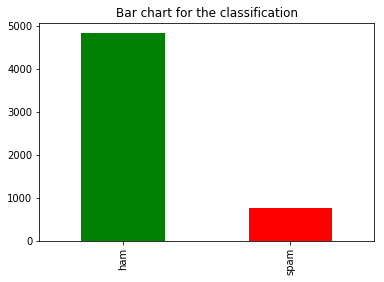

In [8]:
count_Class = pd.value_counts(df["class"], sort= True)
count_Class.plot(kind = 'bar', color= ["green", "red"])
plt.title('Bar chart for the classification')
plt.show()

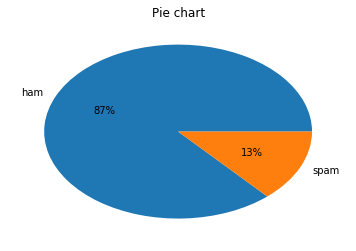

In [9]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

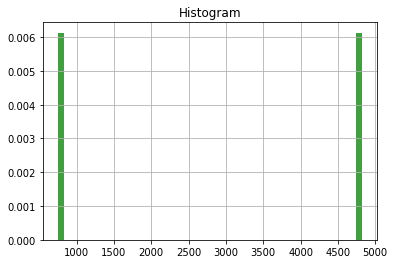

In [10]:
count_Class.hist(bins = 50, density=True, color='blue', facecolor='g', alpha=0.75)
plt.title('Histogram')
plt.ylabel('')
plt.show()

### Text Analysis

 So to apply a model, the necessary preprocessing must be done. For text classification, usual preprocessing includes removing the stop words (words that don't provide us with useful meaning, like the words "and" "or"). Also the characters are converted to a single case (the below function converts to lower case). The function below then stems each word (this means that it replaces a word with the root of that word, for example "tasted" or "tasting" would become "taste").

In [8]:
def pre_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [9]:
textFeatures = df['text'].copy()
textFeatures = textFeatures.apply(pre_process)
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(textFeatures)

features_train, features_test, labels_train, labels_test = train_test_split(features, df['class'], test_size=0.3, random_state = 111)

In [12]:
features_train, labels_train

(<3900x8037 sparse matrix of type '<class 'numpy.float64'>'
 	with 32950 stored elements in Compressed Sparse Row format>, 3466    spam
 3559     ham
 1657     ham
 110      ham
 1010     ham
 3877     ham
 2209     ham
 5487    spam
 4018    spam
 2850     ham
 1475     ham
 4879     ham
 4341     ham
 2514     ham
 2508     ham
 2025     ham
 2552     ham
 1900     ham
 1187     ham
 3703     ham
 4848     ham
 4488     ham
 4027     ham
 5469     ham
 5055     ham
 512      ham
 3149     ham
 4565     ham
 1944     ham
 3523     ham
         ... 
 324      ham
 3542     ham
 747     spam
 2610     ham
 525      ham
 1567     ham
 2382     ham
 1722     ham
 3020     ham
 4133     ham
 2760     ham
 1045     ham
 2466     ham
 5390     ham
 5404     ham
 728      ham
 1904     ham
 1473     ham
 3338     ham
 5388     ham
 5127     ham
 953      ham
 5063     ham
 2856     ham
 4214     ham
 681      ham
 4182     ham
 4820     ham
 2004     ham
 3924     ham
 Name: class, Length: 39

### Support Vector Machine

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc = SVC(kernel='sigmoid', gamma=1.24)
svc.fit(features_train, labels_train)
prediction = svc.predict(features_test)
accuracy_score(labels_test,prediction)

0.979066985645933

### Naive Bayes

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. Naive Bayes is a conditional probability statistical model. The formulae for the same is given as:

$$ {\displaystyle p(C_{k}\mid \mathbf {x} )={\frac {p(C_{k})\ p(\mathbf {x} \mid C_{k})}{p(\mathbf {x} )}}\,} $$

In plain English, using Bayesian probability terminology, the above equation can be written as:

$$ {\displaystyle {\text{posterior}}={\frac {{\text{prior}}\times {\text{likelihood}}}{\text{evidence}}}\,} $$

In [16]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB(alpha = 0.16)
naive_bayes.fit(features_train, labels_train)
prediction = naive_bayes.predict(features_test)
accuracy_score(labels_test,prediction)

0.9856459330143541

### Will the results improve if we use Neural Networks?

### Convolutional Neural Networks

In [17]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

Using TensorFlow backend.


#### Creating the model

In [20]:
model = Sequential()
model.add(Dense(256, input_dim=8037, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8037, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

new_labels_train = []
for i in labels_train:
    if i == "ham":
        new_labels_train.extend('1')
    else:
        new_labels_train.extend('0')
model.fit(features_train, pd.Series(new_labels_train), epochs=75, batch_size=10)
predictions = model.predict(features_test)
rounded = [round(x[0]) for x in predictions]

from sklearn.metrics import accuracy_score

new_labels_test=[]
for i in labels_test:
    if i == "ham":
        new_labels_test.append(1.0)
    else:
        new_labels_test.append(0.0)
accuracy_score(new_labels_test, rounded)

Epoch 1/75
3900/3900 [==============================] - 3s 787us/step - loss: 0.1598 - acc: 0.9459
Epoch 2/75
3900/3900 [==============================] - 2s 541us/step - loss: 0.0152 - acc: 0.9959
Epoch 3/75
3900/3900 [==============================] - 2s 552us/step - loss: 0.0025 - acc: 0.9992
Epoch 4/75
3900/3900 [==============================] - 2s 556us/step - loss: 1.4764e-04 - acc: 1.0000
Epoch 5/75
3900/3900 [==============================] - 2s 563us/step - loss: 8.5925e-06 - acc: 1.0000
Epoch 6/75
3900/3900 [==============================] - 2s 544us/step - loss: 4.6293e-06 - acc: 1.0000
Epoch 7/75
3900/3900 [==============================] - 2s 560us/step - loss: 2.3477e-06 - acc: 1.0000
Epoch 8/75
3900/3900 [==============================] - 2s 589us/step - loss: 1.2442e-06 - acc: 1.0000
Epoch 9/75
3900/3900 [==============================] - 2s 611us/step - loss: 7.2623e-07 - acc: 1.0000
Epoch 10/75
3900/3900 [==============================] - 2s 553us/step - loss: 4.7300

0.9838516746411483